In [1]:
# In this notebook, I will be plotting the position of M33's
# disk particles at timesteps.
# the idea is to show the shape evolution of M33's disk

In [137]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import astropy.table as tbl

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

%matplotlib inline


# my modules
from Readfile import Read
from CenterOfMass import CenterOfMass

In [138]:
# as per Dr. Besla's reccomendation, a rotation


# a function that will rotate the position and velocity vectors
# so that the disk angular momentum is aligned with z axis. 

def RotateFrame(posI,velI):
    # input:  3D array of positions and velocities
    # returns: 3D array of rotated positions and velocities such that j is in z direction
    
    # transpose the inputs
    posI = posI.T
    velI = velI.T
    # compute the angular momentum
    L = np.sum(np.cross(posI,velI), axis=0)
    # normalize the vector
    L_norm = L/np.sqrt(np.sum(L**2))


    # Set up rotation matrix to map L_norm to z unit vector (disk in xy-plane)
    
    # z unit vector
    z_norm = np.array([0, 0, 1])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # rotation matrix
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
    R = I + v_x + np.dot(v_x, v_x)*(1 - c)/s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel


In [141]:
def time_position(snap_id):
    """
    function reads in a data file and returns the position for a given time
    inputs:
         snap_id: the snap_id for each position
         
    returns:
        time: the time, in Gyr
        r: a 3-array containing the positions of the particles at that time
        
    """
    
    path = "/home/astr400b/VLowRes/M33_"
    if snap_id < 9.9:
        filename = path + "00" + str(snap_id) + ".txt"
    elif snap_id < 99.9:
        filename = path + "0" + str(snap_id) + ".txt"
    elif snap_id > 99.9:
        filename = path + str(snap_id) + ".txt"
    
    # read data in the given file using Read
    time,total,data = Read(filename)     
    
    # create instance of CenterOfMass for M33
    COMD = CenterOfMass(filename,2)
    COMP = COMD.COM_P(0.1,4)
    COMV = COMD.COM_V()
    
    # get the positions of the disk particles relative to COM
    x = COMD.x - COMP[0]
    y = COMD.y - COMP[1]
    z = COMD.z - COMP[2]
    
    # store time, x,y,and z as 3-column array
    rt = time, x, y, z

    
    return rt
      

In [142]:
# set time stamps
snap_ids = np.arange(0,800,5)

# make zeros arrays for storage
rt_time = np.zeros(len(snap_ids))
rt_x = np.zeros((len(snap_ids), 9300))
rt_y = np.zeros_like(rt_x)
rt_z = np.zeros_like(rt_x)

# iterate over the time stamps
for i in range(len(snap_ids)):
    # store the values
    rt_time[i] = time_position(snap_ids[i])[0]
    rt_x[i,:] = time_position(snap_ids[i])[1]
    rt_y[i,:] = time_position(snap_ids[i])[2]
    rt_z[i,:] = time_position(snap_ids[i])[3]

rt_r = np.array([rt_x, rt_y, rt_z])

In [173]:
# I only want to plot a few snapshots
# I'll use the Velocity Dispersion plots to determine which times I want

# 0, 5Gyr, 6Gyr, 8Gyr, 10Gyr would be sufficient

# convert time to Gyr
time_Gyr = rt_time/10e2
# array of selected times( for use in plotting)
time_select = np.array([0,5,6,8,10])

#print(time_Gyr)
# create time indices for the time stamps you wish to plot
index0 = np.array(np.where(time_Gyr == 0))[0][0]
index5 = np.array(np.where(time_Gyr == 5))[0][0]
index6 = np.array(np.where(time_Gyr == 6))[0][0]
index8 = np.array(np.where(time_Gyr == 8))[0][0]
index10 = np.array(np.where(time_Gyr == 10))[0][0]


In [144]:
# select the positions corresponding to those timestamps
r0 = rt_r[:,index0,:]
r5 = rt_r[:,index5,:]
r6 = rt_r[:,index6,:]
r8 = rt_r[:,index8,:]
r10 = rt_r[:,index10,:]

In [130]:
# all my rs
rs = np.array([r0, r5, r6, r8, r10])
print(rs.shape)


(5, 3, 9300)


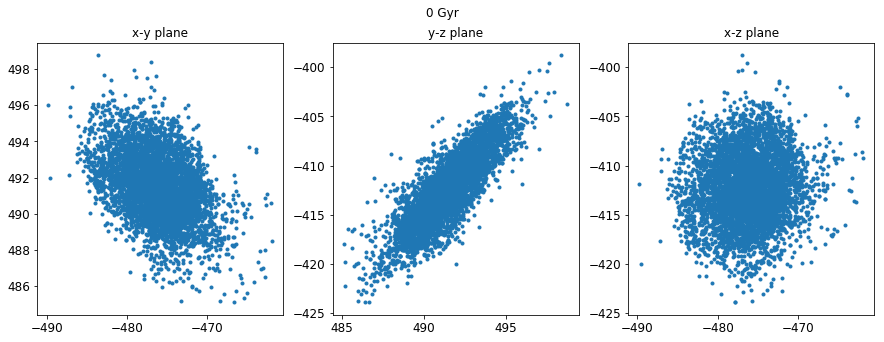

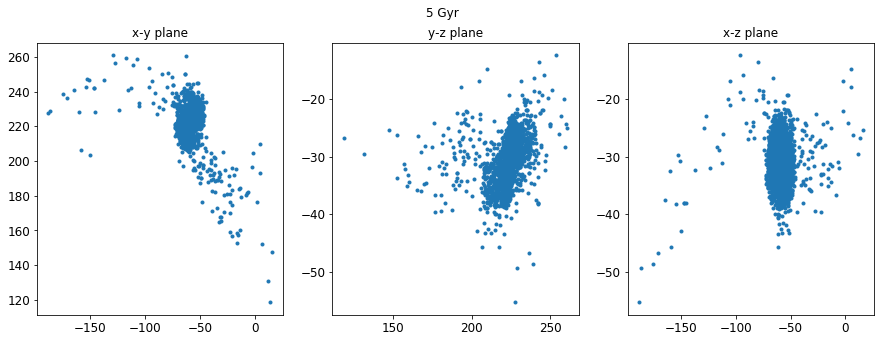

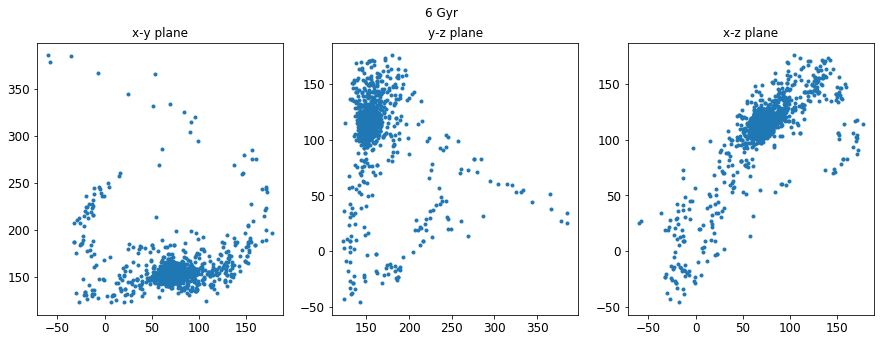

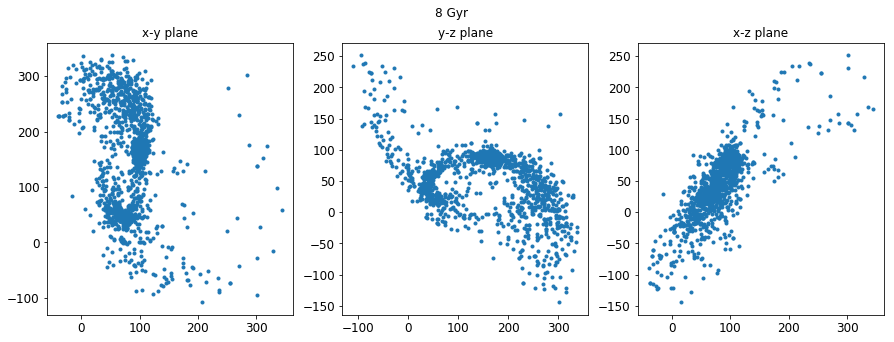

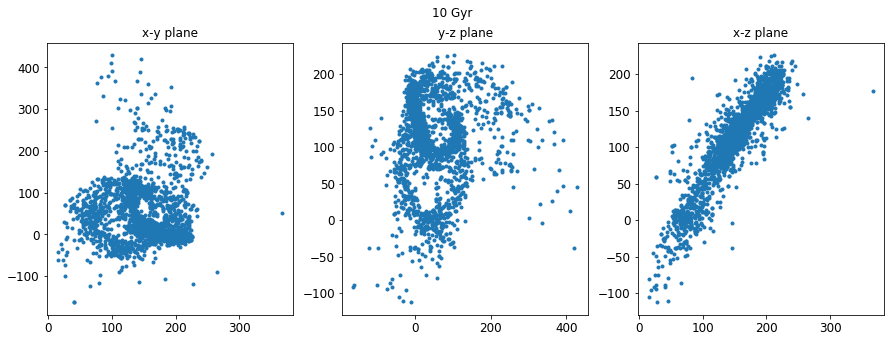

In [186]:
# Make plots 
i = 0
for i in range(5):
    fig, ax= plt.subplots(1,3,figsize=(15,5))
    xD = rs[i,0,:]
    yD = rs[i,1,:]
    zD = rs[i,2,:]
    # plot particle density for M33
    ax[0].scatter(xD, yD, marker=".")
    ax[1].scatter(yD, zD, marker=".")
    ax[2].scatter(xD, zD, marker=".")
    
    # Add subplot titles
    ax[0].set_title("x-y plane")
    ax[1].set_title("y-z plane")
    ax[2].set_title("x-z plane")

    # Add axis labels
    

    # add title
    fig.suptitle("%s Gyr"%time_select[i])

    #adjust tick label font size
    label_size = 12
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    plt.show()
    
    

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
#density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])


# Save to a file

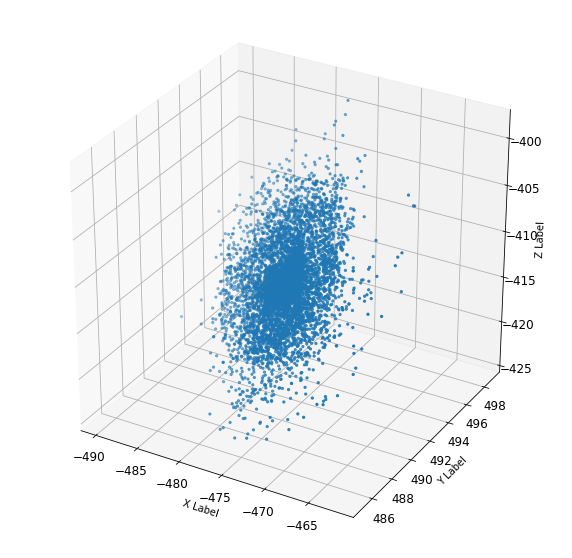

In [192]:
# here I play with plotting the galaxy

fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')

xD = rs[0,0,:]
yD = rs[0,1,:]
zD = rs[0,2,:]


# add colormap
#color = M33_vtot[113,:]
# stuff for colormap I found on stackexchange
#colmap = cm.ScalarMappable(cmap="Wistia")
#colmap.set_array(color)


ax.scatter(xD, yD, zD, marker='.', cmap="Wistia")
#ax.set_xlim(np.min(x),np.max(x))
#ax.set_ylim(np.min(y),np.max(y))
#ax.set_zlim(np.min(z),np.max(z))
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#cb = fig.colorbar(colmap)

plt.show()
